In [1]:
from similarity_scoring import BertSimilarityModel
from transformers import pipeline
import json
from torch.utils.data import Dataset, random_split, DataLoader, RandomSampler, SequentialSampler
import numpy as np

c:\Users\Bruger\miniconda3\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cap = "A blue bird"
poem = "Their feathers too bright \ntheir songs too sweet and wild"

In [3]:
sim_model = BertSimilarityModel(no_hidden_layers=1, hidden_dim=25, max_length=250)

**Input for the BERT Tokenizer**

In [4]:
encoding = sim_model.encode_input(cap, poem)
for key in encoding.keys():
    print(key,":",encoding[key])
tokens = sim_model.tokenizer.convert_ids_to_tokens(encoding["input_ids"].numpy()[0])
print("tokens :",tokens)

input_ids : tensor([[  101,  1037,  2630,  4743,   102,  2037, 12261,  2205,  4408,  2037,
          2774,  2205,  4086,  1998,  3748,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,    

**Initial similarity**

In [5]:
similarity = sim_model.similarity(cap, poem)

print(similarity)

The BERT Classifier has not been trained yet. Similarity might not be good.
0.43496593832969666


**A dataset**

In [6]:
from similarity_data import get_dataloaders
from image_to_poem.data.prep_data import load_json_file

LOAD = False
BATCH_SIZE = 5

data = load_json_file("../../data/caption_poem.json")

In [7]:
train_dataloader, val_dataloader = get_dataloaders(data, sim_model.encode_input, batch_size=BATCH_SIZE, split=0.9)

Number of samples for training = 18
Number of samples for validation = 2


Iteration: 1 	 Loss: 0.6866732835769653 	
Iteration: 2 	 Loss: 0.9320640563964844 	
Iteration: 3 	 Loss: 0.6977068185806274 	
Iteration: 4 	 Loss: 0.5830744504928589 	
Iteration: 5 	 Loss: 0.6843951344490051 	


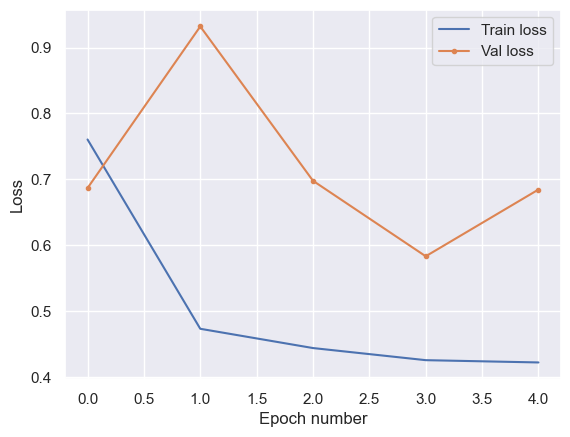

AttributeError: expected 'f' to be string, path, or a file-like object with a 'write' attribute

In [8]:
loss, val_loss = sim_model.train_bert_classifier(train_dataloader, val_dataloader, num_epochs=5, val_epoch=1, learning_rate=0.001, verbose=True)

In [12]:
similarity = sim_model.similarity(cap, poem)

print("New similarity :",similarity.item())

New similarity : 0.6355469226837158
